# CSE 4238 | Assignment 3


My ID: 170104130

Last 3 digits: 130 

Dataset: 2

Model: Bidirectional LSTM 



In [1]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

## Mounting Dataset

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


## Reading Data from Datasets

In [4]:
import pandas as pd
data_labels = pd.read_csv('/content/drive/MyDrive/google colab/Assignment-3/Dataset 2.csv',encoding="ISO-8859-1")

In [6]:
data_labels

,text,polarity
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


## Preprocessing Data

In [7]:
data_labels['text'] = data_labels['text'].apply(lambda x: x.lower())

In [8]:
data_labels

,text,polarity
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat need to send 'em to my accountant tomo...,0
4,add me on myspace!!! myspace.com/lookthunder,0
...,...,...
10309,no depression by g herbo is my mood from now o...,1
10310,what do you do when depression succumbs the br...,1
10311,ketamine nasal spray shows promise against dep...,1
10312,dont mistake a bad day with depression! everyo...,1


In [9]:
import re
data_labels['text'] = data_labels['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

In [10]:
data_labels

,text,polarity
0,just had a real good moment i missssssssss him...,0
1,is reading manga httpplurkcompmzp1e,0
2,comeagainjen httptwitpiccom2y2lx httpwwwyoutu...,0
3,lapcat need to send em to my accountant tomorr...,0
4,add me on myspace myspacecomlookthunder,0
...,...,...
10309,no depression by g herbo is my mood from now o...,1
10310,what do you do when depression succumbs the br...,1
10311,ketamine nasal spray shows promise against dep...,1
10312,dont mistake a bad day with depression everyon...,1


In [11]:
print(data_labels[ data_labels['polarity'] == 0].size)
print(data_labels[ data_labels['polarity'] == 1].size)



16000
4628


## Tokenizing the Data

In [12]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data_labels['text'].values)
X = tokenizer.texts_to_sequences(data_labels['text'].values)
print(X)
X = pad_sequences(X)

[[21, 79, 4, 195, 26, 674, 1, 189, 20, 82], [10, 498], [], [104, 2, 573, 844, 2, 8, 136, 1, 485, 152, 2, 8, 198, 27, 1617, 1332, 187], [414, 17, 16, 699], [20, 1083, 26, 314, 179, 187], [967, 61, 164, 243, 270, 242, 2, 3, 130, 341, 51, 49, 36, 31, 310, 22, 1465, 39], [1466, 58, 1249, 60, 128], [700, 1250, 13, 3, 71], [83, 331, 878, 2, 6], [26, 102, 744], [228, 1, 21, 1333, 8, 374, 360, 243, 4, 374, 37, 16, 3, 1467, 397, 1786], [88, 38, 131, 57, 814, 88, 38, 32, 701, 57, 21, 406, 206, 16, 574], [162, 1, 406, 15, 657, 12, 29, 144, 49, 6, 158, 639], [1, 76, 34, 5], [24, 1, 35, 49, 207, 12, 32], [62, 1, 229, 230, 153, 8, 374, 95, 19, 2, 38, 4, 415, 2, 23, 657, 16], [], [259, 126, 37, 2, 444, 5, 19, 2, 275, 70, 305, 12, 10, 4, 26, 174, 1, 35, 8, 272], [1, 21, 247, 40, 23, 69, 272, 772, 98, 845], [390, 94, 575, 2, 190, 31, 36, 1, 77, 95, 208, 1468, 532], [846, 54, 5, 11, 452, 17, 1, 19, 91, 1334, 1, 279, 66, 2, 3, 209], [159, 165, 25, 24, 8, 1251, 20, 154, 1469, 319], [3, 212, 4, 50, 1, 108,

## Model Preparing

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D,Bidirectional
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

embed_dim = 128
lstm_out = 196

model = Sequential()

model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(Bidirectional(LSTM(lstm_out,return_sequences=True, recurrent_dropout=0.5)))
model.add(Bidirectional(LSTM(lstm_out,return_sequences=True, recurrent_dropout=0.5)))
model.add(Bidirectional(LSTM(lstm_out, recurrent_dropout=0.5)))

model.add(Dense(2,activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss = 'categorical_crossentropy', optimizer=opt,metrics = ['TruePositives','TrueNegatives','FalsePositives','FalseNegatives','accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 63, 128)           256000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 63, 128)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 63, 392)           509600    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 63, 392)           923552    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 392)               923552    
_________________________________________________________________
dense (Dense)                (None, 2)                 786       
Total params: 2,613,490
Trainable params: 2,613,490
Non-trainable params: 0
______________________________________________

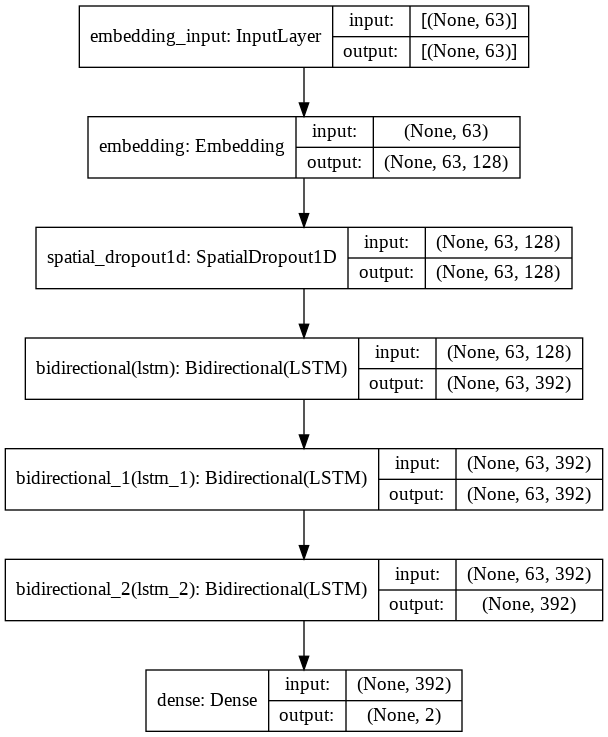

In [14]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file = 'model_plot.png', show_shapes = True, show_layer_names = True)

## Dividing the dataset 8:2 ratio

In [15]:
from sklearn.model_selection import train_test_split

Y = pd.get_dummies(data_labels['polarity']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)


In [ ]:
X_train

array([[   0,    0,    0, ...,    8, 1046, 1141],
       [   0,    0,    0, ...,   11, 1344, 1834],
       [   0,    0,    0, ...,   54,   60,  883],
       ...,
       [   0,    0,    0, ...,    0,    8, 1064],
       [   0,    0,    0, ...,    6,   60,  823],
       [   0,    0,    0, ...,  232,   17,  337]], dtype=int32)

In [ ]:
X_test

array([[   0,    0,    0, ...,  575,    2,   12],
       [   0,    0,    0, ...,  112,   11,    6],
       [   0,    0,    0, ..., 1371,   14,    4],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,  148,    9,   28],
       [   0,    0,    0, ...,   11,    3,  949]], dtype=int32)

In [ ]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(8251, 63) (8251, 2)
(2063, 63) (2063, 2)


## Training Dataset and Performance Evolution

In [ ]:
#Train Dataset
#Learning rate=0.001
batch_size = 32
history=model.fit(X_train, Y_train, epochs = 7, batch_size=batch_size)

Epoch 1/7
258/258 [==============================] - 695s 3s/step - loss: 0.1416 - true_positives: 7829.0000 - true_negatives: 7829.0000 - false_positives: 422.0000 - false_negatives: 422.0000 - accuracy: 0.9489 - precision: 0.9489 - recall: 0.9489
Epoch 2/7
258/258 [==============================] - 691s 3s/step - loss: 0.0416 - true_positives: 8175.0000 - true_negatives: 8175.0000 - false_positives: 76.0000 - false_negatives: 76.0000 - accuracy: 0.9908 - precision: 0.9908 - recall: 0.9908
Epoch 3/7
258/258 [==============================] - 684s 3s/step - loss: 0.0294 - true_positives: 8200.0000 - true_negatives: 8200.0000 - false_positives: 51.0000 - false_negatives: 51.0000 - accuracy: 0.9938 - precision: 0.9938 - recall: 0.9938
Epoch 4/7
258/258 [==============================] - 677s 3s/step - loss: 0.0227 - true_positives: 8210.0000 - true_negatives: 8210.0000 - false_positives: 41.0000 - false_negatives: 41.0000 - accuracy: 0.9950 - precision: 0.9950 - recall: 0.9950
Epoch 5/7


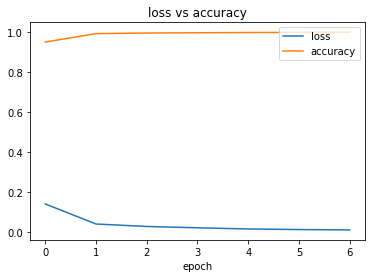

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['accuracy'])
pyplot.title('loss vs accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['loss', 'accuracy'], loc='upper right')
pyplot.show() 


Text(0.5, 0, 'Epoch')

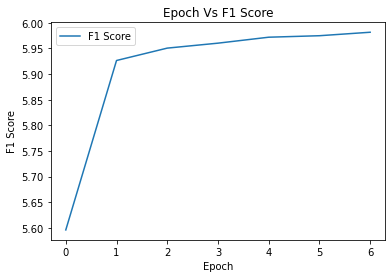

In [ ]:
from matplotlib import pyplot
f1_score = []
for p,r in zip(history.history['precision'], history.history['recall']):
  temp = 2 * ((p*r) + (p+r))
  f1_score.append(temp)
epoch = [x for x in range(21)]

f1_score_df = pd.DataFrame()
f1_score_df = pd.DataFrame(columns = ['Epoch','F1 Score'])
f1_score_df['Epoch'] = pd.Series(epoch)
f1_score_df['F1 Score'] = pd.Series(f1_score)

f1_score_df.plot(x='Epoch', y=['F1 Score'])
pyplot.title('Epoch Vs F1 Score')
pyplot.ylabel('F1 Score')
pyplot.xlabel('Epoch')

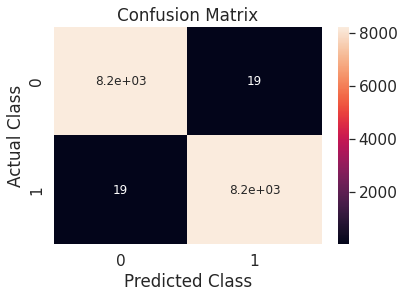

In [ ]:
import seaborn as sn
array = [[history.history['true_positives'][-1],history.history['false_positives'][-1]],
         [history.history['false_negatives'][-1],history.history['true_negatives'][-1]]]
df_cm = pd.DataFrame(array, range(2), range(2))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}) 
pyplot.title('Confusion Matrix')
pyplot.ylabel('Actual Class')
pyplot.xlabel('Predicted Class')
pyplot.savefig('Confusion_Matrix.png')
pyplot.show()

In [16]:
#Test Dataset
batch_size = 32
history=model.fit(X_test, Y_test, epochs = 7, batch_size=batch_size)

Epoch 1/7
65/65 [==============================] - 115s 2s/step - loss: 0.3484 - true_positives: 1771.0000 - true_negatives: 1771.0000 - false_positives: 292.0000 - false_negatives: 292.0000 - accuracy: 0.8585 - precision: 0.8585 - recall: 0.8585
Epoch 2/7
65/65 [==============================] - 105s 2s/step - loss: 0.0424 - true_positives: 2044.0000 - true_negatives: 2044.0000 - false_positives: 19.0000 - false_negatives: 19.0000 - accuracy: 0.9908 - precision: 0.9908 - recall: 0.9908
Epoch 3/7
65/65 [==============================] - 105s 2s/step - loss: 0.0338 - true_positives: 2048.0000 - true_negatives: 2048.0000 - false_positives: 15.0000 - false_negatives: 15.0000 - accuracy: 0.9927 - precision: 0.9927 - recall: 0.9927
Epoch 4/7
65/65 [==============================] - 105s 2s/step - loss: 0.0199 - true_positives: 2056.0000 - true_negatives: 2056.0000 - false_positives: 7.0000 - false_negatives: 7.0000 - accuracy: 0.9966 - precision: 0.9966 - recall: 0.9966
Epoch 5/7
65/65 [===

In [ ]:
#Default Parameter
history=model.fit(X_train, Y_train, epochs = 20, batch_size=30)

Epoch 1/20
276/276 [==============================] - 198s 717ms/step - loss: 0.0087 - true_positives: 8233.0000 - true_negatives: 8233.0000 - false_positives: 18.0000 - false_negatives: 18.0000 - accuracy: 0.9978 - precision: 0.9978 - recall: 0.9978
Epoch 2/20
276/276 [==============================] - 197s 712ms/step - loss: 0.0094 - true_positives: 8232.0000 - true_negatives: 8232.0000 - false_positives: 19.0000 - false_negatives: 19.0000 - accuracy: 0.9977 - precision: 0.9977 - recall: 0.9977
Epoch 3/20
276/276 [==============================] - 196s 712ms/step - loss: 0.0058 - true_positives: 8240.0000 - true_negatives: 8240.0000 - false_positives: 11.0000 - false_negatives: 11.0000 - accuracy: 0.9987 - precision: 0.9987 - recall: 0.9987
Epoch 4/20
276/276 [==============================] - 197s 713ms/step - loss: 0.0058 - true_positives: 8236.0000 - true_negatives: 8236.0000 - false_positives: 15.0000 - false_negatives: 15.0000 - accuracy: 0.9982 - precision: 0.9982 - recall: 0.9

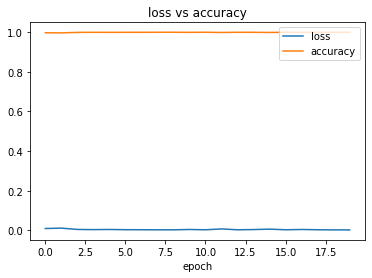

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['accuracy'])
pyplot.title('loss vs accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['loss', 'accuracy'], loc='upper right')
pyplot.show() 


Text(0.5, 0, 'Epoch')

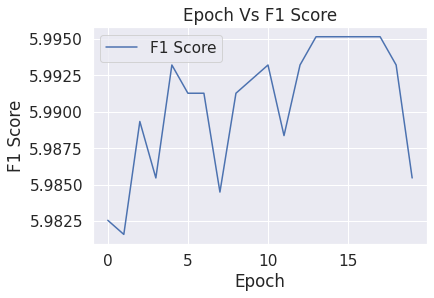

In [ ]:
from matplotlib import pyplot
f1_score = []
for p,r in zip(history.history['precision'], history.history['recall']):
  temp = 2 * ((p*r) + (p+r))
  f1_score.append(temp)
epoch = [x for x in range(21)]

f1_score_df = pd.DataFrame()
f1_score_df = pd.DataFrame(columns = ['Epoch','F1 Score'])
f1_score_df['Epoch'] = pd.Series(epoch)
f1_score_df['F1 Score'] = pd.Series(f1_score)

f1_score_df.plot(x='Epoch', y=['F1 Score'])
pyplot.title('Epoch Vs F1 Score')
pyplot.ylabel('F1 Score')
pyplot.xlabel('Epoch')

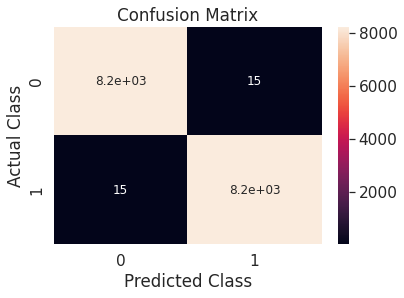

In [ ]:
import seaborn as sn
array = [[history.history['true_positives'][-1],history.history['false_positives'][-1]],
         [history.history['false_negatives'][-1],history.history['true_negatives'][-1]]]
df_cm = pd.DataFrame(array, range(2), range(2))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}) 
pyplot.title('Confusion Matrix')
pyplot.ylabel('Actual Class')
pyplot.xlabel('Predicted Class')
pyplot.savefig('Confusion_Matrix.png')
pyplot.show()

In [ ]:
#Default Parameter
history=model.fit(X_train, Y_train, epochs = 60, batch_size=30)

Epoch 1/60
276/276 [==============================] - 244s 854ms/step - loss: 0.1521 - accuracy: 0.9449
Epoch 2/60
276/276 [==============================] - 231s 837ms/step - loss: 0.0531 - accuracy: 0.9884
Epoch 3/60
276/276 [==============================] - 230s 833ms/step - loss: 0.0259 - accuracy: 0.9935
Epoch 4/60
276/276 [==============================] - 232s 840ms/step - loss: 0.0182 - accuracy: 0.9949
Epoch 5/60
276/276 [==============================] - 232s 841ms/step - loss: 0.0145 - accuracy: 0.9958
Epoch 6/60
276/276 [==============================] - 233s 845ms/step - loss: 0.0092 - accuracy: 0.9975
Epoch 7/60
276/276 [==============================] - 230s 835ms/step - loss: 0.0072 - accuracy: 0.9985
Epoch 8/60
276/276 [==============================] - 230s 833ms/step - loss: 0.0071 - accuracy: 0.9977
Epoch 9/60
276/276 [==============================] - 231s 835ms/step - loss: 0.0057 - accuracy: 0.9984
Epoch 10/60
276/276 [==============================] - 231s 836m

In [ ]:
#learning rate 0.001
history=model.fit(X_train, Y_train, epochs = 7, batch_size=130)

Epoch 1/7
64/64 [==============================] - 386s 6s/step - loss: 0.0091 - true_positives: 8234.0000 - true_negatives: 8234.0000 - false_positives: 17.0000 - false_negatives: 17.0000 - accuracy: 0.9979 - precision: 0.9979 - recall: 0.9979
Epoch 2/7
64/64 [==============================] - 384s 6s/step - loss: 0.0054 - true_positives: 8242.0000 - true_negatives: 8242.0000 - false_positives: 9.0000 - false_negatives: 9.0000 - accuracy: 0.9989 - precision: 0.9989 - recall: 0.9989
Epoch 3/7
64/64 [==============================] - 384s 6s/step - loss: 0.0050 - true_positives: 8240.0000 - true_negatives: 8240.0000 - false_positives: 11.0000 - false_negatives: 11.0000 - accuracy: 0.9987 - precision: 0.9987 - recall: 0.9987
Epoch 4/7
64/64 [==============================] - 389s 6s/step - loss: 0.0045 - true_positives: 8243.0000 - true_negatives: 8243.0000 - false_positives: 8.0000 - false_negatives: 8.0000 - accuracy: 0.9990 - precision: 0.9990 - recall: 0.9990
Epoch 5/7
64/64 [=======

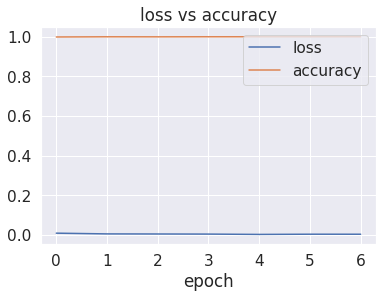

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['accuracy'])
pyplot.title('loss vs accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['loss', 'accuracy'], loc='upper right')
pyplot.show() 


Text(0.5, 0, 'Epoch')

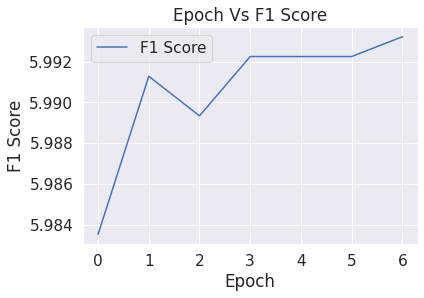

In [ ]:
from matplotlib import pyplot
f1_score = []
for p,r in zip(history.history['precision'], history.history['recall']):
  temp = 2 * ((p*r) + (p+r))
  f1_score.append(temp)
epoch = [x for x in range(21)]

f1_score_df = pd.DataFrame()
f1_score_df = pd.DataFrame(columns = ['Epoch','F1 Score'])
f1_score_df['Epoch'] = pd.Series(epoch)
f1_score_df['F1 Score'] = pd.Series(f1_score)

f1_score_df.plot(x='Epoch', y=['F1 Score'])
pyplot.title('Epoch Vs F1 Score')
pyplot.ylabel('F1 Score')
pyplot.xlabel('Epoch')

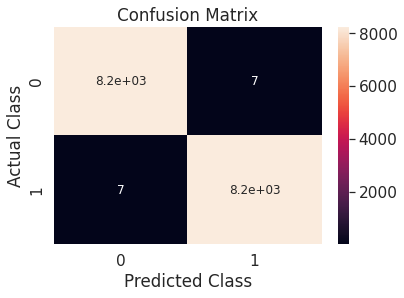

In [ ]:
import seaborn as sn
array = [[history.history['true_positives'][-1],history.history['false_positives'][-1]],
         [history.history['false_negatives'][-1],history.history['true_negatives'][-1]]]
df_cm = pd.DataFrame(array, range(2), range(2))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}) 
pyplot.title('Confusion Matrix')
pyplot.ylabel('Actual Class')
pyplot.xlabel('Predicted Class')
pyplot.savefig('Confusion_Matrix.png')
pyplot.show()

In [ ]:
#Default Parameter
history=model.fit(X_train, Y_train, epochs = 20, batch_size=200)

Epoch 1/20
42/42 [==============================] - 87s 2s/step - loss: 0.4690 - accuracy: 0.7872
Epoch 2/20
42/42 [==============================] - 82s 2s/step - loss: 0.1302 - accuracy: 0.9593
Epoch 3/20
42/42 [==============================] - 82s 2s/step - loss: 0.0365 - accuracy: 0.9901
Epoch 4/20
42/42 [==============================] - 82s 2s/step - loss: 0.0220 - accuracy: 0.9947
Epoch 5/20
42/42 [==============================] - 82s 2s/step - loss: 0.0190 - accuracy: 0.9955
Epoch 6/20
42/42 [==============================] - 81s 2s/step - loss: 0.0156 - accuracy: 0.9956
Epoch 7/20
42/42 [==============================] - 82s 2s/step - loss: 0.0132 - accuracy: 0.9966
Epoch 8/20
42/42 [==============================] - 82s 2s/step - loss: 0.0090 - accuracy: 0.9976
Epoch 9/20
42/42 [==============================] - 82s 2s/step - loss: 0.0072 - accuracy: 0.9981
Epoch 10/20
42/42 [==============================] - 82s 2s/step - loss: 0.0121 - accuracy: 0.9971
Epoch 11/20
42/42 [

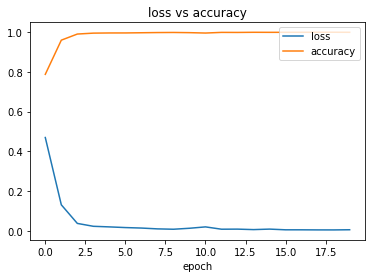

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['accuracy'])
pyplot.title('loss vs accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['loss', 'accuracy'], loc='upper right')
pyplot.show() 


In [ ]:
#Default Parameter
history=model.fit(X_train, Y_train, epochs = 20, batch_size=150)

Epoch 1/20
56/56 [==============================] - 98s 2s/step - loss: 0.0056 - accuracy: 0.9985
Epoch 2/20
56/56 [==============================] - 98s 2s/step - loss: 0.0049 - accuracy: 0.9988
Epoch 3/20
56/56 [==============================] - 98s 2s/step - loss: 0.0053 - accuracy: 0.9988
Epoch 4/20
56/56 [==============================] - 98s 2s/step - loss: 0.0047 - accuracy: 0.9988
Epoch 5/20
56/56 [==============================] - 98s 2s/step - loss: 0.0047 - accuracy: 0.9988
Epoch 6/20
56/56 [==============================] - 98s 2s/step - loss: 0.0040 - accuracy: 0.9987
Epoch 7/20
56/56 [==============================] - 98s 2s/step - loss: 0.0037 - accuracy: 0.9992
Epoch 8/20
56/56 [==============================] - 98s 2s/step - loss: 0.0039 - accuracy: 0.9993
Epoch 9/20
56/56 [==============================] - 98s 2s/step - loss: 0.0036 - accuracy: 0.9990
Epoch 10/20
56/56 [==============================] - 98s 2s/step - loss: 0.0039 - accuracy: 0.9989
Epoch 11/20
56/56 [

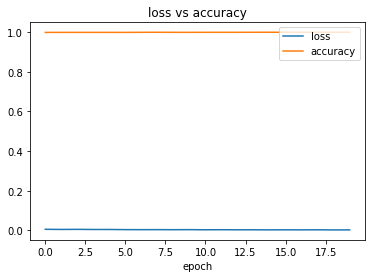

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['accuracy'])
pyplot.title('loss vs accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['loss', 'accuracy'], loc='upper right')
pyplot.show() 


In [ ]:
#Learning Parameter 0.001
history=model.fit(X_train, Y_train, epochs =10, batch_size=300)

Epoch 1/10
28/28 [==============================] - 91s 2s/step - loss: 0.4963 - accuracy: 0.7705
Epoch 2/10
28/28 [==============================] - 67s 2s/step - loss: 0.2160 - accuracy: 0.9200
Epoch 3/10
28/28 [==============================] - 68s 2s/step - loss: 0.0672 - accuracy: 0.9816
Epoch 4/10
28/28 [==============================] - 68s 2s/step - loss: 0.0313 - accuracy: 0.9931
Epoch 5/10
28/28 [==============================] - 67s 2s/step - loss: 0.0219 - accuracy: 0.9942
Epoch 6/10
28/28 [==============================] - 67s 2s/step - loss: 0.0179 - accuracy: 0.9953
Epoch 7/10
28/28 [==============================] - 67s 2s/step - loss: 0.0127 - accuracy: 0.9968
Epoch 8/10
28/28 [==============================] - 67s 2s/step - loss: 0.0097 - accuracy: 0.9976
Epoch 9/10
28/28 [==============================] - 67s 2s/step - loss: 0.0095 - accuracy: 0.9970
Epoch 10/10
28/28 [==============================] - 67s 2s/step - loss: 0.0084 - accuracy: 0.9981


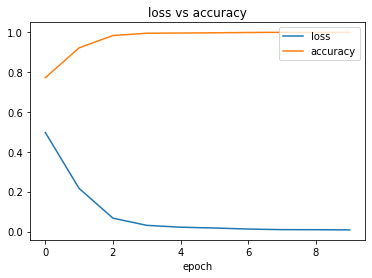

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['accuracy'])
pyplot.title('loss vs accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['loss', 'accuracy'], loc='upper right')
pyplot.show() 


In [ ]:
#Learning Rate 0.001
history=model.fit(X_train, Y_train, epochs =10, batch_size=40)

Epoch 1/10
207/207 [==============================] - 152s 735ms/step - loss: 0.0245 - accuracy: 0.9935
Epoch 2/10
207/207 [==============================] - 153s 739ms/step - loss: 0.0122 - accuracy: 0.9967
Epoch 3/10
207/207 [==============================] - 153s 738ms/step - loss: 0.0094 - accuracy: 0.9978
Epoch 4/10
207/207 [==============================] - 152s 736ms/step - loss: 0.0194 - accuracy: 0.9960
Epoch 5/10
207/207 [==============================] - 153s 737ms/step - loss: 0.0076 - accuracy: 0.9979
Epoch 6/10
207/207 [==============================] - 152s 734ms/step - loss: 0.0067 - accuracy: 0.9979
Epoch 7/10
207/207 [==============================] - 152s 732ms/step - loss: 0.0064 - accuracy: 0.9984
Epoch 8/10
207/207 [==============================] - 151s 732ms/step - loss: 0.0040 - accuracy: 0.9992
Epoch 9/10
207/207 [==============================] - 151s 732ms/step - loss: 0.0045 - accuracy: 0.9990
Epoch 10/10
207/207 [==============================] - 152s 734m

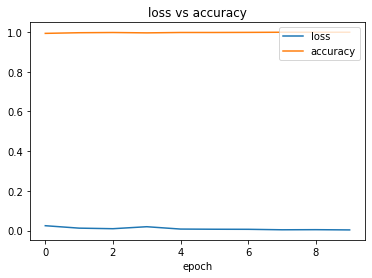

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['accuracy'])
pyplot.title('loss vs accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['loss', 'accuracy'], loc='upper right')
pyplot.show() 
